## GSE196728

In [2]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import PCA_func as pc
import matplotlib.pyplot as plt
from umap import UMAP

### Step 1: Open the dataset

In [31]:
path = '/Users/maksimsgolubovics/Python_VScode/Studienprojekt/rnaseq_datasets/GSE196728_rnaseq.h5ad'
adata = ad.read_h5ad(path)

#Transform to DataFrame
data_df = pd.DataFrame(data=adata.X, columns=adata.var.index, index=adata.obs.index).T

#Look at sampeles features
adata.var[['altitude', 'subject', 'time']]
adata.var['altitude'].unique()



['PU', 'RI', 'SL']
Categories (3, object): ['PU', 'RI', 'SL']

The data do not appear to be complete. There should be 144 samples.

### Step 2: Prepare the dataset

In [17]:
data_df_log = np.log10(data_df + 0.1) #Logarithmic transformation

### Step 3: Exploratory analysis

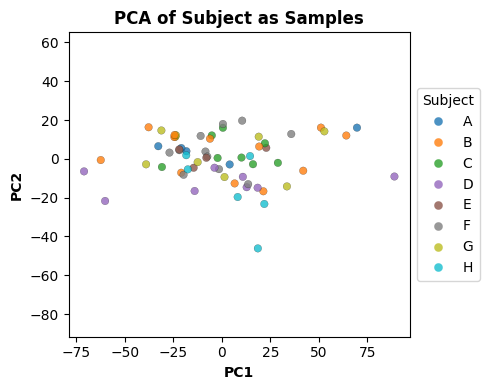

In [20]:
data_df_log_time = data_df_log.join(adata.var['subject']).reset_index().set_index('subject').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Subject', c_map='tab10')

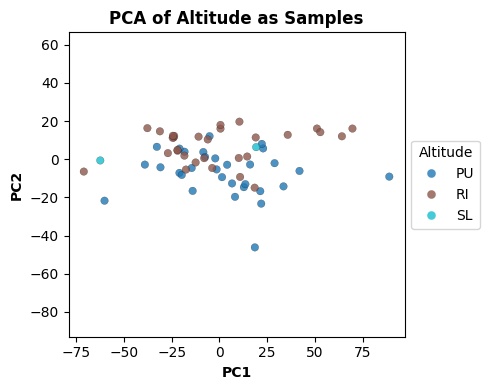

In [21]:
data_df_log_time = data_df_log.join(adata.var['altitude']).reset_index().set_index('altitude').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Altitude', c_map='tab10')

### Step 5: Identify mean and std threshold values

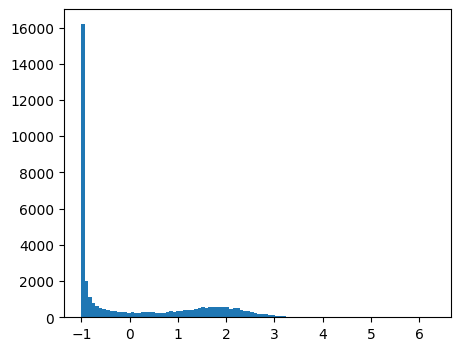

In [ ]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.mean(), bins=100);

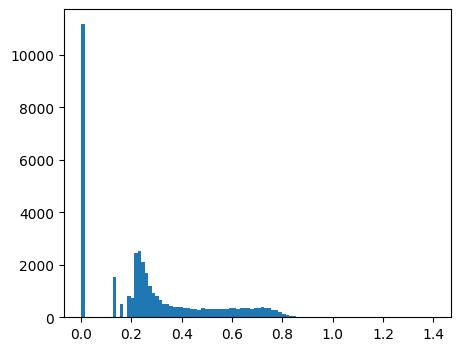

In [30]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.std(), bins=100);

### Step 5: COFE

In [46]:
X_train_a = data_df_log[adata.var['altitude'] == 'PU']
true_time_train_a = adata.var[adata.var['altitude'] == 'PU']['time'].astype(int)

X_train_a, X_test_a, features_a, features_std_a = COFE.analyse.preprocess_data(X_train_a.to_numpy(), None, 
                                                                           features=X_train_a.columns, feature_dim='col', 
                                                                           mean_threshold= 1,scaling_threshold=5)
X_train_a.shape # (Samples, Transcripts)

(31, 9877)

In [47]:
s_choices = np.linspace(1, 50, 15)
cv_a = COFE.analyse.cross_validate(X_train_a, s_choices, features=features_a, K=5, ncores=-1)

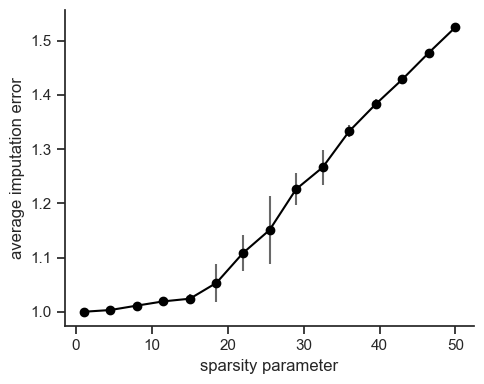

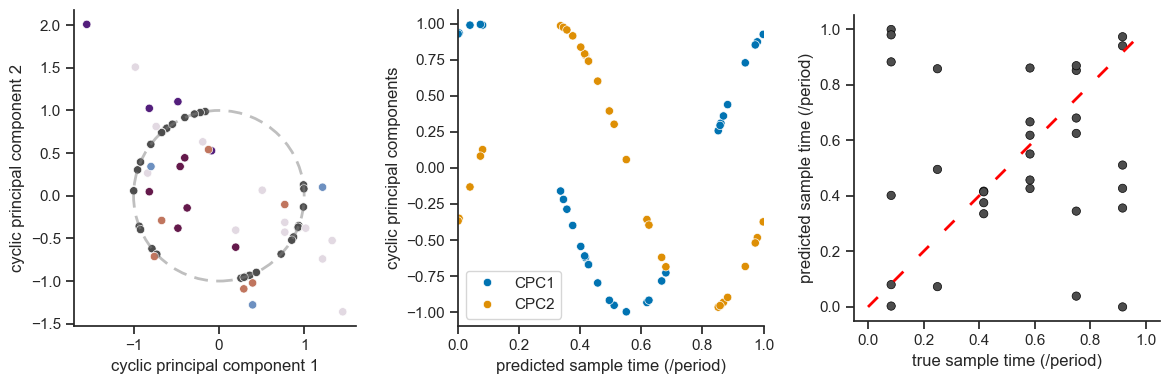

In [48]:
results_train_diet_a = COFE.analyse.predict_time(X_train_a, cv_a, true_times=true_time_train_a.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_a, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_a, time=true_time_train_a.to_numpy(), X=X_train_a, figsize=(12, 4), period=24)

In [49]:
results_train_diet_a["MAPE"]*24

np.float64(2.4877344476538505)

In [54]:
X_train_b = data_df_log[adata.var['altitude'] == 'RI']
true_time_train_b = adata.var[adata.var['altitude'] == 'RI']['time'].astype(int)

X_train_b, X_test_b, features_b, features_std_b = COFE.analyse.preprocess_data(X_train_b.to_numpy(), None, 
                                                                           features=X_train_b.columns, feature_dim='col', 
                                                                           mean_threshold= 1,scaling_threshold=5)
X_train_b.shape # (Samples, Transcripts)

(30, 11353)

In [55]:
s_choices = np.linspace(1, 50, 15)
cv_b = COFE.analyse.cross_validate(X_train_b, s_choices, features=features_b, K=5, ncores=-1)

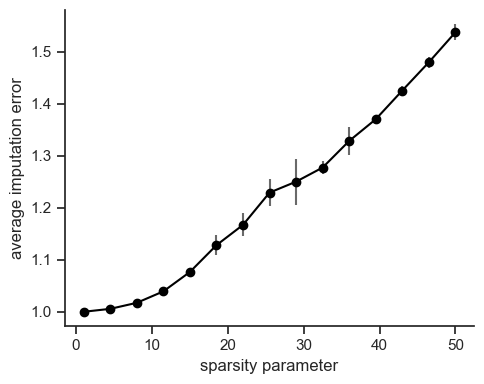

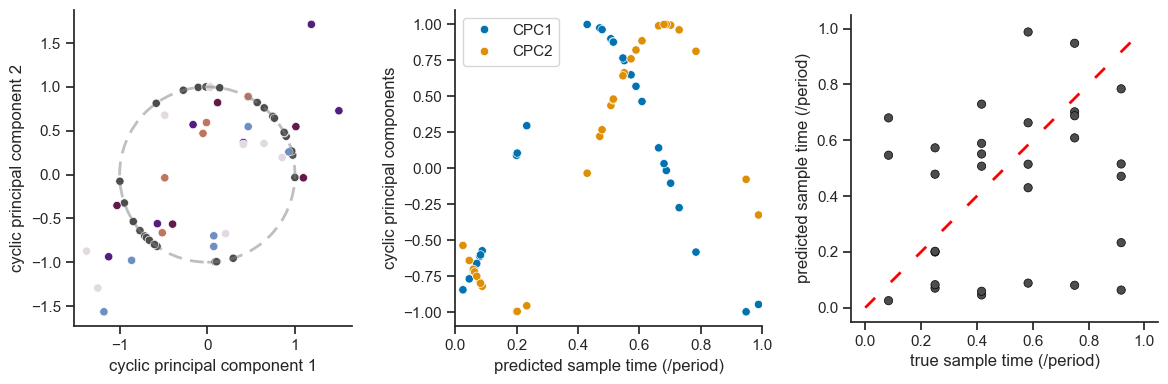

In [57]:
results_train_diet_b = COFE.analyse.predict_time(X_train_b, cv_b, true_times=true_time_train_b.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_b, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_b, time=true_time_train_b.to_numpy(), X=X_train_b, figsize=(12, 4), period=24)